In [59]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import pickle
import scipy.io as spio
import scipy.stats as sp
import mat73
import seaborn as sns
from scipy.special import factorial
from scipy.special import logsumexp
import matplotlib
import pandas as pd

from scipy import stats

In [3]:
%load_ext autoreload
%autoreload 2

In [66]:
%matplotlib widget

In [4]:
import replay_structure.structure_models as models
from replay_structure.run_snippet_preprocessing import Run_Snippet_Preprocessing
import replay_structure.metadata as meta
from replay_structure.utils import get_marginal_sum, get_p_models

from replay_structure.metadata import (
    Likelihood_Function,
    Model,
    Diffusion,
    Momentum,
    Stationary,
    Stationary_Gaussian,
    Random,
    Data_Type,
    string_to_data_type,
    string_to_model,
    Session_Indicator,
    string_to_session_indicator,
    string_to_likelihood_function,
)

## load structure data

In [5]:
bin_size_cm=5
#time_window_ms=3
time_window_ms=15

In [13]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/structure_analysis_input/Data4Pset_ripples_'+str(bin_size_cm)+'cm_'+str(time_window_ms)+'ms_poisson.obj'
filename_run = RESULTS_PATH+'/structure_analysis_input/Data4Pset_fullrun_'+str(bin_size_cm)+'cm_200ms_poisson.obj'
filename_run_raw = RESULTS_PATH+'/Data4Pset_full_run_'+str(bin_size_cm)+'cm_200ms_poisson.obj'

In [14]:
with open(filename, "rb") as file_object:
    raw_data = file_object.read()
    structure_data = pickle.loads(raw_data)

In [15]:
with open(filename_run, "rb") as file_object:
    raw_data = file_object.read()
    structure_data_run = pickle.loads(raw_data)

In [16]:
with open(filename_run_raw, "rb") as file_object:
    raw_data = file_object.read()
    data_run_raw = pickle.loads(raw_data)

In [10]:
structure_data.params.likelihood_function_params.rate_scaling

2.5

# Dynamic Models

In [21]:
model_results = models.Random(structure_data).get_model_evidences()
model_results

array([ -42.42177814,  -61.61244786, -135.14129083,  -48.74953022,
        -42.81304889,  -81.6553054 ,  -42.05204155,  -97.13165722,
        -51.93815569,  -72.0945142 , -104.46785574,  -37.07350403,
       -193.45799403,  -46.98531379,  -42.85196321,  -32.97851839,
        -72.80787913,  -27.05708049,  -35.81926359,  -56.94623525,
        -20.16166758,  -54.17691709,  -82.56928722, -192.76912378,
        -82.78434602,  -53.49741228,  -34.73615219,  -40.96258227,
        -24.84361064, -122.27479136, -263.22050471,  -34.03468782,
        -82.03392794, -103.19850502,  -36.15104795,  -48.39624836,
        -63.41071264,  -23.15061845,  -59.26599835,  -86.10100004,
        -28.02687767,  -33.4119003 ,  -33.45155162,  -63.58032176,
        -48.60643772,  -75.09973871, -172.52046344,  -70.45584463,
        -65.82226856,  -35.54904108,  -73.50426986,  -74.16740316,
        -65.78813795,  -83.12057839,  -20.053664  ,  -64.01259166,
        -49.25327362, -136.72830616,  -31.98954386,  -28.79431

In [22]:
model_results_stat = models.Stationary(structure_data).get_model_evidences()
model_results_stat

array([ -42.08510129,  -57.85317374, -167.52069341,  -45.95452051,
        -41.53408104,  -79.83092572,  -39.5789803 ,  -87.94505654,
        -51.93439612,  -74.20303587, -105.61322923,  -31.87555672,
       -285.62804436,  -49.24044647,  -41.65053525,  -29.72581179,
        -58.72269032,  -23.9920852 ,  -32.62229875,  -58.09581276,
        -19.43692869,  -54.62826417,  -87.6444831 , -209.45668885,
        -87.98305305,  -47.18236185,  -33.17611458,  -33.89276102,
        -22.69563699, -100.55438724, -243.81612632,  -33.22241669,
        -74.93831447,  -90.9199544 ,  -35.14990208,  -49.820247  ,
        -62.45375847,  -21.60273676,  -56.87429718,  -96.09401592,
        -26.97158975,  -32.0803074 ,  -33.12155904,  -78.49318783,
        -43.53100416,  -68.41268319, -270.11140087,  -71.6450745 ,
        -67.94245504,  -32.04041332,  -69.6522059 ,  -70.26722341,
        -67.45883341,  -82.48562779,  -18.61140921,  -59.93459644,
        -48.46436256, -161.26668254,  -28.18334709,  -29.74910

In [23]:
model_results_gaus = models.Stationary_Gaussian(structure_data, 0.1).get_model_evidences()
model_results_gaus

array([ -41.20303265,  -58.06716961, -169.10269751,  -45.15676045,
        -41.71284187,  -74.61875037,  -40.18783045,  -88.46873263,
        -48.86047765,  -72.41736045, -104.69650809,  -32.83494544,
       -256.46300797,  -45.67803367,  -41.02537845,  -30.25993235,
        -60.66042787,  -24.58446684,  -33.43208836,  -58.47033263,
        -19.52227634,  -53.72106732,  -87.42491454, -211.24025037,
        -87.01794187,  -46.02276784,  -33.50469386,  -35.98501269,
        -23.06143323, -103.22159806, -250.79213128,  -33.40522985,
        -76.64149441,  -89.6969785 ,  -34.33816715,  -46.93228778,
        -59.15319069,  -21.89155194,  -55.09150222,  -88.80613143,
        -26.82229467,  -32.51888882,  -33.15167418,  -76.4290685 ,
        -43.93783914,  -69.26076798, -213.33178821,  -68.82112313,
        -65.03515117,  -32.86324765,  -67.18861459,  -70.89171559,
        -66.07544714,  -81.46704055,  -18.78019504,  -56.5459293 ,
        -49.28584693, -150.30308295,  -28.25153294,  -30.30986

In [24]:
model_results_diff = models.Diffusion(structure_data, 0.85).get_model_evidences()
model_results_diff

array([ -41.37551742,  -57.80135439, -137.00169438,  -44.7277757 ,
        -41.68793216,  -73.02897203,  -40.03297193,  -88.58541382,
        -48.48473756,  -70.76537688, -103.49853021,  -32.58765146,
       -202.34258688,  -45.76054002,  -41.08237177,  -30.10075309,
        -60.95957573,  -24.34815795,  -33.27818805,  -58.2370098 ,
        -19.50829972,  -53.52916406,  -79.22727478, -193.22349467,
        -78.56996542,  -45.00180738,  -33.47996671,  -35.64239522,
        -22.92307925, -104.39882153, -251.66234754,  -33.2245843 ,
        -77.44636744,  -89.02995959,  -34.01455993,  -46.06749724,
        -57.43732006,  -21.79989118,  -54.06309977,  -83.3756632 ,
        -26.86319962,  -32.37332602,  -33.10734845,  -68.26311607,
        -43.86942204,  -68.71280165, -158.61555685,  -67.89263097,
        -63.42565576,  -32.60689845,  -65.47344864,  -70.99036128,
        -66.15787224,  -78.85241109,  -18.72387347,  -55.01626687,
        -49.03588941, -117.83743879,  -28.01469222,  -30.15169

In [80]:
model_results_mom = models.Momentum(structure_data, 0.03, 90, 80).get_model_evidences()
model_results_mom

array([ -42.31430347,  -57.91934708, -130.53513918,  -44.21083452,
        -41.67790266,  -73.10199654,  -39.79597039,  -88.47402437,
        -49.19020522,  -70.70527368, -102.84303841,  -32.24020872,
       -194.39163483,  -48.75122783,  -40.90024654,  -29.89200345,
        -60.82505021,  -23.9920852 ,  -33.01337185,  -58.17614576,
        -19.43692869,  -53.16962869,  -76.68956363, -190.47356525,
        -76.35789227,  -44.64843173,  -33.17611458,  -35.08403136,
        -22.69563699, -104.0210873 , -251.09585858,  -33.47639807,
        -77.68563234,  -88.79125947,  -34.63641447,  -47.11766894,
        -57.71803064,  -21.60273676,  -54.64589679,  -82.80258744,
        -26.97158975,  -32.0803074 ,  -33.12406632,  -64.57353416,
        -43.60744341,  -68.90459095, -156.66424388,  -67.84262977,
        -62.97890133,  -32.40420578,  -65.92972815,  -71.50473298,
        -66.80942044,  -78.66441051,  -18.61140921,  -55.6093067 ,
        -48.68409332, -115.50314532,  -27.97964296,  -30.01195

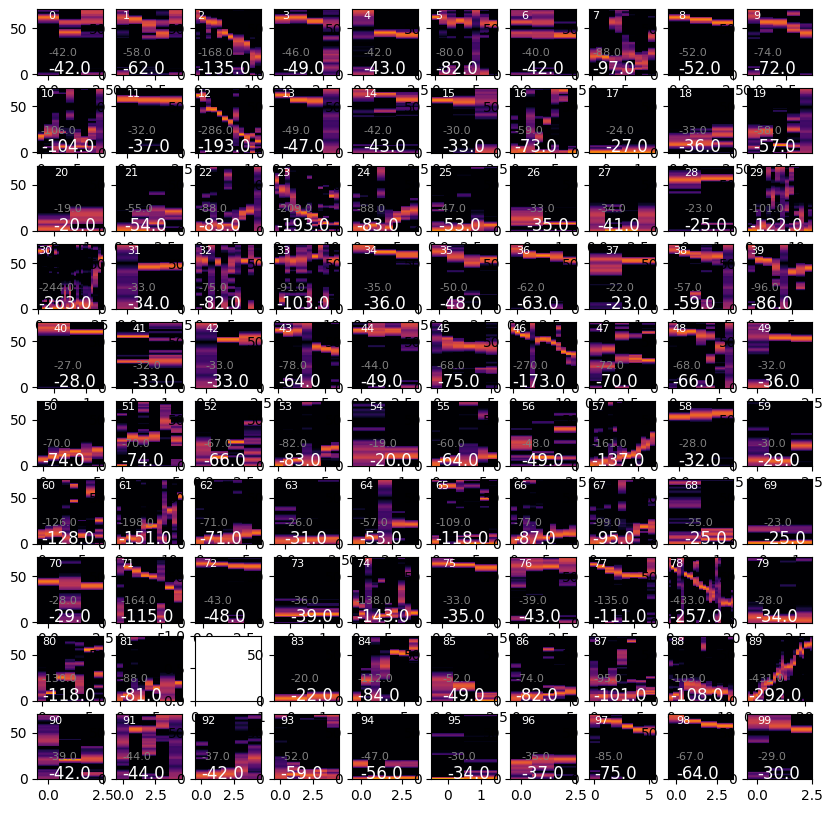

In [81]:
fig, ax = plt.subplots(10,10, figsize=(10,10))
for spikemat_ind in range(100):
    model_results_marginals = models.Random(structure_data).get_spikemat_marginals(spikemat_ind)
    if model_results_marginals is not np.nan:
        marginal_plot = get_marginal_sum(model_results_marginals)
        ax.flatten()[spikemat_ind].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax.flatten()[spikemat_ind].text(0, 0, str(model_results[spikemat_ind].round()), fontsize=12, color='white')
        ax.flatten()[spikemat_ind].text(0, 20, str(model_results_stat[spikemat_ind].round()), fontsize=8, color='grey')
        ax.flatten()[spikemat_ind].text(0, 60, str(spikemat_ind), fontsize=8, color='white')

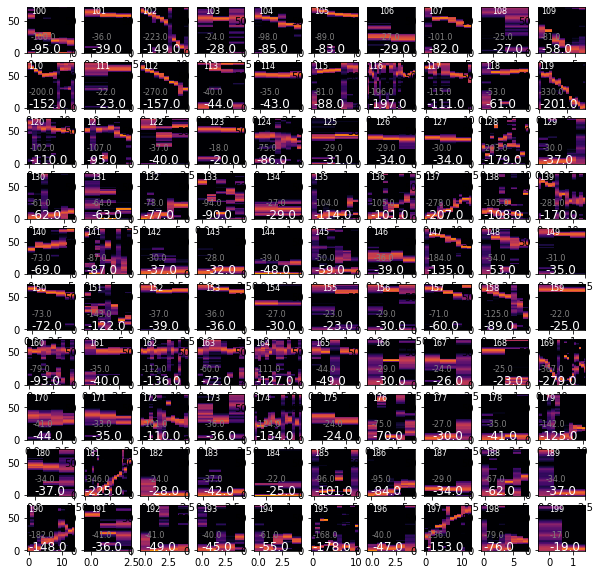

In [15]:
fig, ax = plt.subplots(10,10, figsize=(10,10))
for spikemat_ind in range(100):
    model_results_marginals = models.Random(structure_data).get_spikemat_marginals(spikemat_ind+100)
    if model_results_marginals is not np.nan:
        marginal_plot = get_marginal_sum(model_results_marginals)
        ax.flatten()[spikemat_ind].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax.flatten()[spikemat_ind].text(0, 0, str(model_results[spikemat_ind+100].round()), fontsize=12, color='white')
        ax.flatten()[spikemat_ind].text(0, 20, str(model_results_stat[spikemat_ind+100].round()), fontsize=8, color='grey')
        ax.flatten()[spikemat_ind].text(0, 60, str(spikemat_ind+100), fontsize=8, color='white')

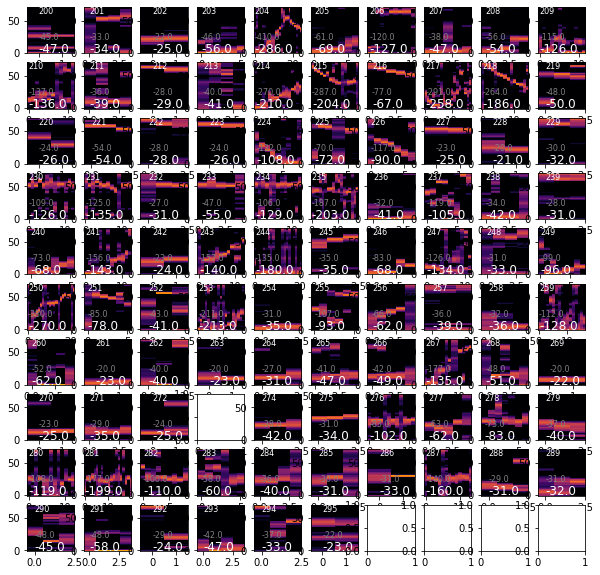

In [16]:
fig, ax = plt.subplots(10,10, figsize=(10,10))
for spikemat_ind in range(96):
    model_results_marginals = models.Random(structure_data).get_spikemat_marginals(spikemat_ind+200)
    if model_results_marginals is not np.nan:
        marginal_plot = get_marginal_sum(model_results_marginals)
        ax.flatten()[spikemat_ind].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax.flatten()[spikemat_ind].text(0, 0, str(model_results[spikemat_ind+200].round()), fontsize=12, color='white')
        ax.flatten()[spikemat_ind].text(0, 20, str(model_results_stat[spikemat_ind+200].round()), fontsize=8, color='grey')
        ax.flatten()[spikemat_ind].text(0, 60, str(spikemat_ind+200), fontsize=8, color='white')

# Grid Seach

In [26]:
import replay_structure.structure_models_gridsearch as gridsearch
from replay_structure.config import (
    Structure_Model_Gridsearch_Parameters)
from replay_structure.model_comparison import (
    Gridsearch_Marginalization,
    Model_Comparison,
)

In [27]:
params = Structure_Model_Gridsearch_Parameters.ripple_stationary_gaussian_params()
# sd_array_meters=np.logspace(-2, 0.3, 30).round(2)
sg_gridsearch = gridsearch.Stationary_Gaussian(structure_data, params)

sd = 0.01
sd = 0.01
sd = 0.01
sd = 0.02
sd = 0.02
sd = 0.02
sd = 0.03
sd = 0.04
sd = 0.04
sd = 0.05
sd = 0.06
sd = 0.07
sd = 0.09
sd = 0.11
sd = 0.13
sd = 0.15
sd = 0.19
sd = 0.22
sd = 0.27
sd = 0.32
sd = 0.39
sd = 0.46
sd = 0.56
sd = 0.67
sd = 0.8
sd = 0.96
sd = 1.1
sd = 1.4
sd = 1.7
sd = 2.0


In [28]:
params = Structure_Model_Gridsearch_Parameters.ripple_diffusion_params()
# sd_array_meters=np.logspace(-1, 0.8, 30).round(2)
diffusion_gridsearch = gridsearch.Diffusion(structure_data, params)

sd = 0.1
[ -42.08497029  -57.85317364 -167.52271814  -45.95381175  -41.53406053]
sd = 0.12
[ -42.08344098  -57.85316765 -167.5463145   -45.94557021  -41.53382178]
sd = 0.13
[ -42.08123134  -57.85314344 -167.58027456  -45.93376683  -41.53347917]
sd = 0.15
[ -42.07241699  -57.85286522 -167.71409093  -45.88786679  -41.53214066]
sd = 0.18
[ -42.04981657  -57.85084232 -168.0443007   -45.77810635  -41.52893772]
sd = 0.2
[ -42.03231643  -57.84796645 -168.28732171  -45.70029447  -41.52674801]
sd = 0.24
[ -41.99812336  -57.83877373 -168.7232253   -45.56630325  -41.5237043 ]
sd = 0.27
[ -41.97238324  -57.82889537 -168.94968705  -45.48159712  -41.52291586]
sd = 0.31
[ -41.93490084  -57.81201566 -168.56419259  -45.37828121  -41.52381903]
sd = 0.36
[ -41.88187529  -57.7874374  -166.37288532  -45.25912342  -41.52779788]
sd = 0.42
[ -41.81139051  -57.75845361 -162.70312265  -45.13213085  -41.53631502]
sd = 0.48
[ -41.73725172  -57.7354841  -158.98630211  -45.02417151  -41.54852495]
sd = 0.56
[ -41.63

In [20]:
np.logspace(-1, 0.8, 30).round(2)

array([0.1 , 0.12, 0.13, 0.15, 0.18, 0.2 , 0.24, 0.27, 0.31, 0.36, 0.42,
       0.48, 0.56, 0.64, 0.74, 0.85, 0.98, 1.14, 1.31, 1.51, 1.74, 2.01,
       2.32, 2.68, 3.09, 3.56, 4.11, 4.74, 5.47, 6.31])

In [21]:
params = Structure_Model_Gridsearch_Parameters.ripple_momentum_params()
# sd_array_meters=np.logspace(1.6, 2.6, 30).round(2)
# decay_array=np.array([1, 25, 50, 75, 100, 200, 300, 400, 500, 800])
# initial_sd_m_per_s=10

momentum_gridsearch_all = []
adjust_params = False
for spikemat_ind in list(structure_data.spikemats.keys()):
    momentum_gridsearch = gridsearch.Momentum(
            structure_data, params, spikemat_ind, adjust_params=adjust_params
        )
    momentum_gridsearch_all.append(momentum_gridsearch)

sd = 4e+01
decay = 1
decay = 25
decay = 50
decay = 75
decay = 100
decay = 200
decay = 300
decay = 400
decay = 500
decay = 800
sd = 4.3e+01
decay = 1
decay = 25
decay = 50
decay = 75
decay = 100
decay = 200
decay = 300
decay = 400
decay = 500
decay = 800
sd = 4.7e+01
decay = 1
decay = 25
decay = 50
decay = 75
decay = 100
decay = 200
decay = 300
decay = 400
decay = 500
decay = 800
sd = 5.1e+01
decay = 1
decay = 25
decay = 50
decay = 75
decay = 100
decay = 200
decay = 300
decay = 400
decay = 500
decay = 800
sd = 5.5e+01
decay = 1
decay = 25
decay = 50
decay = 75
decay = 100
decay = 200
decay = 300
decay = 400
decay = 500
decay = 800
sd = 5.9e+01
decay = 1
decay = 25
decay = 50
decay = 75
decay = 100
decay = 200
decay = 300
decay = 400
decay = 500
decay = 800
sd = 6.4e+01
decay = 1
decay = 25
decay = 50
decay = 75
decay = 100
decay = 200
decay = 300
decay = 400
decay = 500
decay = 800
sd = 6.9e+01
decay = 1
decay = 25
decay = 50
decay = 75
decay = 100
decay = 200
decay = 300
decay = 400
de

In [22]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/mom_gridsearch'+str(bin_size_cm)+'cm_200ms_poisson.obj'

serialized = pickle.dumps(momentum_gridsearch_all)
with open(filename, "wb") as file_object:
    file_object.write(serialized)

In [38]:
RESULTS_PATH = "/home/katharina/Documents/Studium/MIT/project/1D/results"
filename = RESULTS_PATH+'/mom_gridsearch'+str(bin_size_cm)+'cm_200ms_poisson.obj'
with open(filename, "rb") as file_object:
    raw_data = file_object.read()
    momentum_gridsearch_all = pickle.loads(raw_data)

## Model comparison

In [32]:
sg_marginalized_gridsearch = Gridsearch_Marginalization(sg_gridsearch)
#sg_marginalized_gridsearch.marginalized_model_evidences
#sg_marginalized_gridsearch.marginalization_info['best_fit_gridsearch_params']['sd_meters']

294
(296, 30) (30,)


In [33]:
dif_marginalized_gridsearch = Gridsearch_Marginalization(diffusion_gridsearch)

294
(296, 30) (30,)


In [34]:
dif_sd_meters = dif_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]["sd_meters"]

In [35]:
# mode from diffusion gridsearch on all sessions
MAX_LIKELIHOOD_SD_METERS_RIPPLES = stats.mode(dif_sd_meters)
MAX_LIKELIHOOD_SD_METERS_RIPPLES

ModeResult(mode=array([0.1]), count=array([95]))

In [40]:
#aggregate_momentum_gridsearch
n_spikemats = len(structure_data.spikemats)
momentum_gridsearch_0 = momentum_gridsearch_all[0]
n_sd = len(momentum_gridsearch_0.gridsearch_params["sd_array_meters"])
n_decay = len(momentum_gridsearch_0.gridsearch_params["decay_array"])
gridsearch_results = np.full((n_spikemats, n_sd, n_decay), np.nan)
to_run_on_o2_medium = np.array([])
for ripple in range(n_spikemats):
    gridsearch_results[ripple] = momentum_gridsearch_all[ripple].gridsearch_results
momentum_gridsearch_aggregated = momentum_gridsearch_0
momentum_gridsearch_aggregated.gridsearch_results = gridsearch_results

In [42]:
mom_marginalized_gridsearch = Gridsearch_Marginalization(momentum_gridsearch_aggregated)

294


In [43]:
mom_marginalized_gridsearch.gridsearch_params

{'sd_array_meters': array([ 39.81,  43.1 ,  46.66,  50.52,  54.69,  59.21,  64.11,  69.4 ,
         75.14,  81.35,  88.07,  95.35, 103.23, 111.76, 120.99, 130.99,
        141.82, 153.53, 166.22, 179.96, 194.83, 210.93, 228.36, 247.23,
        267.66, 289.78, 313.73, 339.65, 367.72, 398.11]),
 'decay_array': array([  1,  25,  50,  75, 100, 200, 300, 400, 500, 800]),
 'initial_sd_m_per_s': 10,
 'sd_0_meters': 0.15}

In [44]:
model_evidences = dict()
model_evidences["random"] = model_results
model_evidences["stationary"] = model_results_stat
model_evidences["stationary_gaussian"] = sg_marginalized_gridsearch.marginalized_model_evidences
model_evidences["diffusion"] = dif_marginalized_gridsearch.marginalized_model_evidences
model_evidences["momentum"] = mom_marginalized_gridsearch.marginalized_model_evidences

In [45]:
random_effects_prior = 10

In [46]:
mc_results = Model_Comparison(
    model_evidences, random_effects_prior=random_effects_prior
)

    diffusion    momentum  stationary  stationary_gaussian      random  \
0  -41.552481  -42.607107  -42.085101           -41.401338  -42.421778   
1  -57.927742  -59.020189  -57.853174           -58.165446  -61.612448   
2 -126.740406 -127.338662 -167.520693          -138.219128 -135.141291   
3  -45.091940  -45.016429  -45.954521           -45.548904  -48.749530   
4  -41.708810  -41.952578  -41.534081           -41.790942  -42.813049   

             mll_model  
0  stationary_gaussian  
1           stationary  
2            diffusion  
3             momentum  
4           stationary  
momentum               109
stationary              99
diffusion               55
random                  19
stationary_gaussian     12
Name: mll_model, dtype: int64
294
[0.3337805  0.37605898 0.14455415 0.07845271 0.06715366]


In [210]:
pd.set_option('display.max_rows', None)

In [211]:
mc_results.results_dataframe

,diffusion,momentum,stationary,stationary_gaussian,random,mll_model
0,-41.552481,-42.607107,-42.085101,-41.401338,-42.421778,stationary_gaussian
1,-57.927742,-59.020189,-57.853174,-58.165446,-61.612448,stationary
2,-126.740406,-127.338662,-167.520693,-138.219128,-135.141291,diffusion
3,-45.091940,-45.016429,-45.954521,-45.548904,-48.749530,momentum
4,-41.708810,-41.952578,-41.534081,-41.790942,-42.813049,stationary
5,-73.680783,-75.835012,-79.830926,-75.312957,-81.655305,diffusion
6,-39.965658,-40.221848,-39.578980,-40.103424,-42.052042,stationary
7,-88.374269,-90.847540,-87.945057,-88.512691,-97.131657,stationary
8,-49.006502,-48.463093,-51.934396,-49.456036,-51.938156,momentum
9,-69.746328,-70.571207,-74.203036,-71.212892,-72.094514,diffusion


In [50]:
mc_results.results_dataframe.to_pickle("mc_results.pkl")

## grid search parameters

In [60]:
sg_index = mc_results.results_dataframe.index[mc_results.results_dataframe['mll_model'] == 'stationary_gaussian'].tolist()
sg_sd = sg_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'][sg_index]

sd_array_meters_sg = np.logspace(-2, 0.3, 30).round(2)

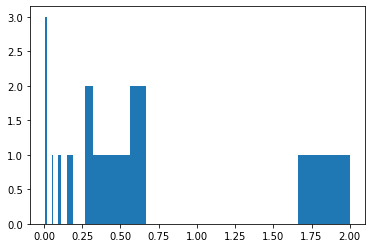

In [62]:
plt.figure()
plt.hist(sg_sd, bins=sd_array_meters_sg)
plt.show()

In [222]:
diff_index = mc_results.results_dataframe.index[mc_results.results_dataframe['mll_model'] == 'diffusion'].tolist()
diff_sd = dif_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'][diff_index]

array_meters_diff = np.logspace(-1, 0.8, 30).round(2)

In [226]:
dif_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'].shape

(294,)

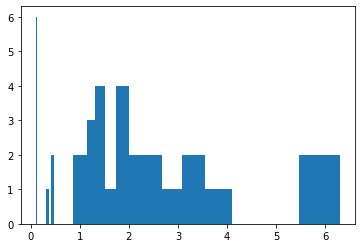

In [63]:
plt.figure()
plt.hist(diff_sd, bins=array_meters_diff)
plt.show()

In [54]:
mom_index = mc_results.results_dataframe.index[mc_results.results_dataframe['mll_model'] == 'momentum'].tolist()

mom_decay = mom_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['decay'][mom_index]
decay_array=np.array([1, 25, 50, 75, 100, 200, 300, 400, 500, 800])

mom_sd = mom_marginalized_gridsearch.marginalization_info["best_fit_gridsearch_params"]['sd_meters'][mom_index]
sd_array_meters=np.logspace(1.6, 2.6, 30).round(2)

In [47]:
mom_decay

array([ 25,  25,  50,  75,  25,  75,   1,   1,   1,   1,  25,  50,  50,
        50,  75,  25, 300,   1, 100,   1,   1,  25,  25,  50,  50,   1,
         1,  50,   1,   1,  25, 200,  75, 800,   1,  50,  50, 800,  50,
         1,   1,   1,   1, 800,  75,  50, 200,  50,   1, 400,   1,   1,
         1,   1,  25,  75,  75,   1, 800,   1,   1, 800,   1,   1,   1,
         1, 500,   1,   1,  25,   1, 800,   1, 800, 800,   1, 200, 800,
       200,   1,   1,   1, 500, 800,  75, 800,  25,  50,   1,  25,   1,
       400,  50,   1,   1, 300,   1,   1, 500,  50, 800,  25,   1, 800,
       800, 800, 800, 800, 300, 800, 500])

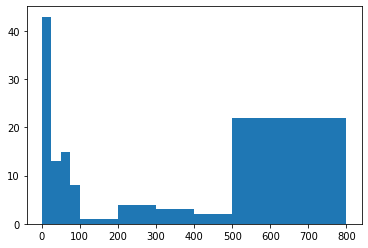

In [57]:
plt.figure()
plt.hist(mom_decay, bins=decay_array)
plt.show()

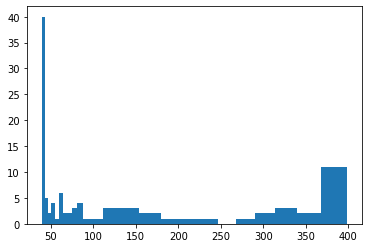

In [58]:
plt.figure()
plt.hist(mom_sd, bins=sd_array_meters)
plt.show()

## results

In [90]:
p_rip_model = []
for i in range(294):
    p_rip_model.append(get_p_models(mc_results.results_dataframe[meta.MODELS_AS_STR].iloc[i].values))

In [74]:
mc_results.random_effects_results

{'gibbs': array([[0.26992406, 0.18209054, 0.27755162, 0.11517388, 0.1552599 ],
        [0.37117809, 0.27764004, 0.22596464, 0.05821567, 0.06700156],
        [0.38032052, 0.28242171, 0.16827512, 0.05792769, 0.11105497],
        ...,
        [0.38730083, 0.26532718, 0.20396383, 0.08260502, 0.06080314],
        [0.35541508, 0.37553255, 0.13038805, 0.0574716 , 0.08119272],
        [0.31165668, 0.41404751, 0.14620401, 0.0540871 , 0.0740047 ]]),
 'alpha_m': array([[117.,  89.,  82.,  27.,  29.],
        [127., 108.,  65.,  18.,  26.],
        [144.,  97.,  52.,  20.,  31.],
        ...,
        [122., 115.,  58.,  27.,  22.],
        [115., 146.,  42.,  23.,  18.],
        [102., 138.,  57.,  21.,  26.]]),
 'p_models': array([0.3337805 , 0.37605898, 0.14455415, 0.07845271, 0.06715366]),
 'p_exceedance': array([0.33111111, 0.66888889, 0.        , 0.        , 0.        ])}

In [73]:
# calculate mean/sd p(M|X) across sessions
p_models = mc_results.random_effects_results["p_models"]
    
p_models_mean = np.mean(p_models, axis=0)
p_models_sd = np.std(p_models, axis=0)

# print p(M|X) mean and sd
for i, model in enumerate(meta.MODELS_AS_STR):
    print(f"{model} model: {np.round(p_models[i]*100, 1)}%")

# print p(M|X) grouped by trajectory/non-trajectory models
print("\n")
sum_trajectory = np.sum(p_models[:2])*100
sum_nontrajectory = np.sum(p_models[2:])*100
print(f"trajectory models: {np.round(np.mean(sum_trajectory), 1)}%")
print(f"non-trajecotry models: {np.round(np.mean(sum_nontrajectory), 1)}%")

diffusion model: 33.4%
momentum model: 37.6%
stationary model: 14.5%
stationary_gaussian model: 7.8%
random model: 6.7%


trajectory models: 71.0%
non-trajecotry models: 29.0%


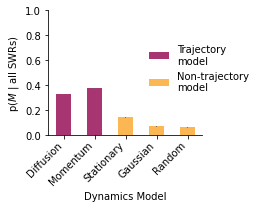

In [194]:
fig, ax = plt.subplots(1,1, figsize=(3,3))

x_axis = np.arange(meta.N_MODELS)+.5
temporal_model_colors = {True: '#9e1f63', False: '#fbb040'}
model_colors = [temporal_model_colors[model.trajectory] for model in meta.MODELS]



i = 0
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xticks(x_axis)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_xlim([0,meta.N_MODELS-.05])
ax.tick_params(axis='y')
ax.set_ylabel("p($M$ | all SWRs)")
ax.set_xlabel("Dynamics Model")
ax.set_ylim([0,1])
ax.tick_params(axis='x', pad=.7)

custom_patches = [matplotlib.patches.Patch(facecolor=temporal_model_colors[True], alpha=.9,label='Trajectory\nmodel'),
               matplotlib.patches.Patch(facecolor=temporal_model_colors[False], alpha=.9,label='Non-trajectory\nmodel'),
              ]
ax.legend(
    handles=custom_patches, 
    bbox_to_anchor=(0.6, 0.8, 0, 0),
    ncol=1,
    frameon=False)

ax.bar(x_axis, p_models,
        width=.5, color=model_colors, alpha=.9)

ax.scatter(x_axis+(np.random.rand()-.5)/8, p_models, s=5, color='dimgray', zorder=100, marker='.', linewidths=0)
plt.tight_layout()
plt.savefig('fig/dymoall', dpi=500,  bbox_inches='tight')

In [52]:
ripple_selection_ind = [3, 8, 12, 23, 39, 46, 57, 71, 78, 89, 102, 112, 127, 147, 197, 204, 250, 280, 285]

/home/katharina/Documents/Studium/MIT/project/1D/replay_structure/utils.py:281: RuntimeWarning: divide by zero encountered in log
  marginal_plot = np.log(marginal_norm)


Text(0, 0.5, 'momentum ')

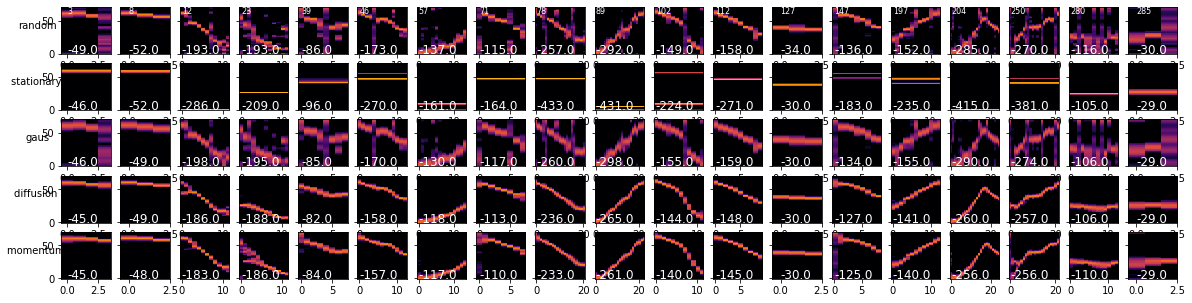

In [55]:
fig, ax = plt.subplots(5,len(ripple_selection_ind), figsize=(20,5), sharey=True)
for i, spikemat_ind in enumerate(ripple_selection_ind):
    random = models.Random(structure_data).get_spikemat_marginals(spikemat_ind)
    if random is not np.nan:
        marginal_plot = get_marginal_sum(random)
        ax[0,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[0,i].text(0, 0, str(model_evidences['random'][spikemat_ind].round()), fontsize=12, color='white')
        ax[0,i].text(0, 60, str(spikemat_ind), fontsize=8, color='white')
    stat = models.Stationary(structure_data).get_spikemat_marginals(spikemat_ind)
    if stat is not np.nan:
        stat = np.tile(stat,(structure_data.spikemats[spikemat_ind].shape[0],1))
        marginal_plot = get_marginal_sum(stat.T)
        ax[1,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[1,i].text(0, 0, str(model_evidences['stationary'][spikemat_ind].round()), fontsize=12, color='white')
    gaus = models.Stationary_Gaussian(structure_data, 0.1).get_spikemat_marginals(spikemat_ind)
    if gaus is not np.nan:
        marginal_plot = get_marginal_sum(gaus)
        ax[2,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[2,i].text(0, 0, str(model_evidences['stationary_gaussian'][spikemat_ind].round()), fontsize=12, color='white')
    diffusion = models.Diffusion(structure_data, 0.85).get_spikemat_marginals(spikemat_ind)
    if diffusion is not np.nan:
        marginal_plot = get_marginal_sum(diffusion)
        ax[3,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[3,i].text(0, 0, str(model_evidences['diffusion'][spikemat_ind].round()), fontsize=12, color='white')
    momentum = models.Momentum(structure_data, 1, 90, 80, plotting=True).get_spikemat_marginals(spikemat_ind)
    if momentum is not np.nan:
        marginal_plot = get_marginal_sum(momentum)
        ax[4,i].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
        ax[4,i].text(0, 0, str(model_evidences['momentum'][spikemat_ind].round()), fontsize=12, color='white')
ax[0,0].set_ylabel('random', rotation=0)
ax[1,0].set_ylabel('stationary ', rotation=0)
ax[2,0].set_ylabel('gaus', rotation=0)
ax[3,0].set_ylabel('diffusion ', rotation=0)
ax[4,0].set_ylabel('momentum ', rotation=0)

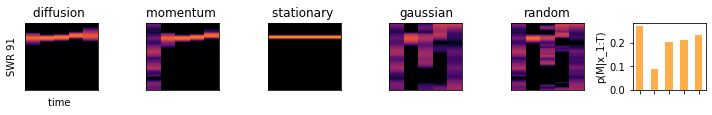

In [225]:
spikemat_ind = 91

fig, ax = plt.subplots(1,6, figsize=(10,1.7), sharey=False)

random = models.Random(structure_data).get_spikemat_marginals(spikemat_ind)
if random is not np.nan:
    marginal_plot = get_marginal_sum(random)
    ax[4].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
stat = models.Stationary(structure_data).get_spikemat_marginals(spikemat_ind)
if stat is not np.nan:
    stat = np.tile(stat,(structure_data.spikemats[spikemat_ind].shape[0],1))
    marginal_plot = get_marginal_sum(stat.T)
    ax[2].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
gaus = models.Stationary_Gaussian(structure_data, 0.1).get_spikemat_marginals(spikemat_ind)
if gaus is not np.nan:
    marginal_plot = get_marginal_sum(gaus)
    ax[3].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
diffusion = models.Diffusion(structure_data, 0.85).get_spikemat_marginals(spikemat_ind)
if diffusion is not np.nan:
    marginal_plot = get_marginal_sum(diffusion)
    ax[0].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')
momentum = models.Momentum(structure_data, 1, 90, 80, plotting=True).get_spikemat_marginals(spikemat_ind)
if momentum is not np.nan:
    marginal_plot = get_marginal_sum(momentum)
    ax[1].imshow(marginal_plot,aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4),interpolation='none')

x_ticks = np.arange(meta.N_MODELS) +.5
ax[5].set_xticks(x_ticks)
ax[5].bar(x_ticks, p_rip_model[spikemat_ind], width=.5, color='darkorange', alpha=.7)
ax[5].set_xticklabels(['', '', '', '', ''])

ax[5].set_ylabel('p(M|x_1:T)')
for i in range(5):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
ax[4].set_title('random', rotation=0)
ax[0].set_ylabel('SWR '+str(spikemat_ind))
ax[2].set_title('stationary ', rotation=0)
ax[3].set_title('gaussian', rotation=0)
ax[0].set_title('diffusion ', rotation=0)
ax[0].set_xlabel('time ', rotation=0)
ax[1].set_title('momentum ', rotation=0)

plt.tight_layout()
#plt.savefig('fig/dymo278', dpi=500, transparent=True)

# run

In [195]:
structure_data_run.spikemats.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

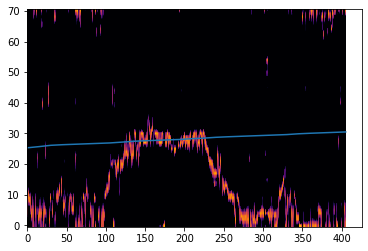

In [196]:
spikemat_ind = 12
model_results_marginals = models.Random(structure_data_run).get_spikemat_marginals(spikemat_ind)
marginal_plot = get_marginal_sum(model_results_marginals)
plt.figure()
plt.imshow(marginal_plot,
           aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
t = np.linspace(0 , model_results_marginals.shape[1], data_run_raw.run_info['true_trajectories_cm'][spikemat_ind].shape[0])
plt.plot(t, data_run_raw.run_info['true_trajectories_cm'][spikemat_ind]/5)
plt.show()

In [197]:
spikemat_ind = 12
model_results_marginals = models.Diffusion(structure_data_run, 0.14).get_spikemat_marginals(spikemat_ind)
marginal_plot = get_marginal_sum(model_results_marginals)
plt.figure()
plt.imshow(marginal_plot,
           aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
t = np.linspace(0 , model_results_marginals.shape[1], data_run_raw.run_info['true_trajectories_cm'][spikemat_ind].shape[0])
plt.plot(t, data_run_raw.run_info['true_trajectories_cm'][spikemat_ind]/5)
plt.show()

AttributeError: 'Structure_Analysis_Input' object has no attribute 'running_direction'

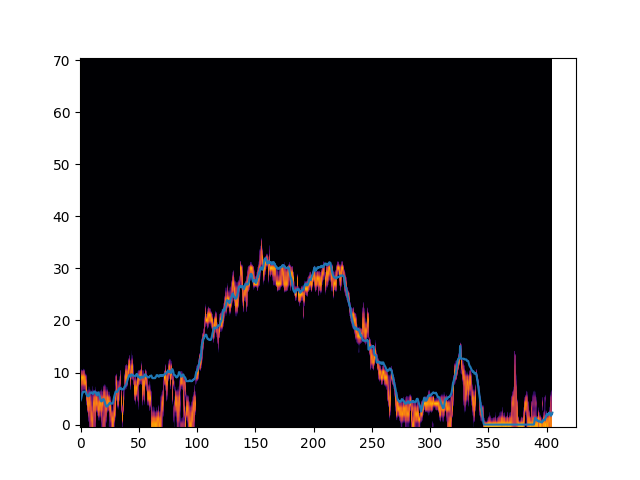

In [336]:
spikemat_ind = 12
model_results_marginals = models.Momentum(structure_data_run, 0.03, 2.4, 20, plotting=True).get_spikemat_marginals(spikemat_ind)
marginal_plot = get_marginal_sum(model_results_marginals)
plt.figure()
plt.imshow(marginal_plot,
           aspect='auto', origin='lower', cmap='inferno',vmin=np.log(.001), vmax=np.log(4))
t = np.linspace(0 , model_results_marginals.shape[1], data_run_raw.run_info['true_trajectories_cm'][spikemat_ind].shape[0])
plt.plot(t, data_run_raw.run_info['true_trajectories_cm'][spikemat_ind]/5)
plt.show()